![image.png](attachment:image.png)

##### **Good luck with taking your exam. Keep working and make your dreams all come true. Seeing the results of all of your hard work will make this struggle worth it. We’re all thinking of you.** 
<b><font color='blue'>AI-PRO Spark Team ITI</font></b>

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [ ]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 51.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=5e495e03855efe2d3a48866a5472dc0cee451a16227fcd2b28703525c7fdf0ed
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
pip install findspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DoubleType
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
import seaborn as sns

### Create a data schema programatically

In [ ]:
schema = StructType([ \
    StructField("id", IntegerType(),True), \
    StructField("gender",StringType(),True), \
    StructField("age",DoubleType(),True), \
    StructField("hypertension", IntegerType(), True), \
    StructField("heart_disease", IntegerType(), True), \
    StructField("ever_married", StringType(), True), \
    StructField("work_type", StringType(), True), \
    StructField("Residence_type", StringType(), True), \
    StructField("avg_glucose_level", DoubleType(), True), \
    StructField("bmi", DoubleType(), True), \
    StructField("smoking_status", StringType(), True), \
    StructField("stroke", IntegerType(), True)
  ])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
spark = SparkSession.builder.getOrCreate()

In [ ]:
df = spark.read.csv('healthcare-dataset-stroke-data.csv', header=True, schema=schema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
df.show(n=10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [ ]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [ ]:
df.summary().show()

+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|summary|               id|gender|               age|      hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|  count|             5110|  5110|              5110|              5110|               5110|        5110|     5110|          5110|              5110|              4909|          5110|               5110|
|   mean|36517.82935420744|  null|43.226614481409015|0.0974559686888454|0.05401174168297456|        null|     null|          null|106.14767710371804|28.893236911794673|          null| 

In [ ]:
print(df.count())

5110


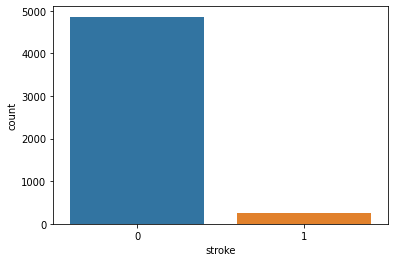

In [ ]:
plot_df = df.toPandas()
ax = sns.countplot(x="stroke", data=plot_df)

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [ ]:
df.select('age').summary().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    25%|              25.0|
|    50%|              45.0|
|    75%|              61.0|
|    max|              82.0|
+-------+------------------+



In [ ]:
df = df.select('*').filter('age >= 2')

In [ ]:
df.select('age').summary().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    25%|              27.0|
|    50%|              45.0|
|    75%|              61.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [ ]:
df.select('gender', 'smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [ ]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [ ]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [ ]:
def gender_num(strr):
  if not strr:
    return strr
  elif strr == 'Male':
    return 1 
  elif strr == 'Female' or strr == 'Other':
    return 0 

fudf = udf(lambda x: gender_num(x)) 
res_df = df.withColumn("gender", fudf(F.col("gender")))
res_df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|     0|79.0|           1|            0|         

In [ ]:
def smoke_num(strr):
  if not strr:
    return strr
  elif strr == 'never smoked':
    return 0 
  elif strr == 'Unknown':
    return 0.5
  elif strr == 'formerly smoked':
    return 0.75
  elif strr == 'smokes':
    return 1.0

fudf = udf(lambda x: smoke_num(x)) 
res_df1 = res_df.withColumn("smoking_status", fudf(F.col("smoking_status")))
res_df1.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|             0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|             0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Sel

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [ ]:
res_df1.select('gender', 'smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|             0|
|     1|             0|
|     0|           1.0|
|     0|             0|
|     1|          0.75|
|     1|             0|
|     0|             0|
|     0|           0.5|
|     0|           0.5|
|     0|             0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|             0|
|     0|             0|
|     1|           1.0|
|     1|           1.0|
|     0|             0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [ ]:
res_df1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = false)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [ ]:
#### bmi is the column with missing values so we will fill missing values with the mean value

In [ ]:
bmi_mean = res_df1.agg({'bmi':'avg'}).collect()[0][0]
print(bmi_mean)

29.140855057351413


In [ ]:
res_df1 = res_df1.na.fill(value=bmi_mean,subset=["bmi"])

In [ ]:
#### check that bmi column is now without missing values

In [ ]:
res_df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in res_df1.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [ ]:
train, test = res_df1.randomSplit([.8,.2], seed=42)
print(f"There are {train.count()} rows in the training set, and {test.count()} in the test set")

There are 4037 rows in the training set, and 953 in the test set


In [ ]:
train.write.parquet("train.parquet")

In [ ]:
test.write.parquet("test.parquet")

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
traindf = spark.read.parquet("train.parquet")

In [ ]:
testdf = spark.read.parquet("test.parquet")

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [ ]:
categoricalCols = [field for (field, dataType) in traindf.dtypes if dataType == "string"]
categoricalCols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
indexOutputCols = [x + "_Index" for x in categoricalCols]
indexOutputCols

['gender_Index',
 'ever_married_Index',
 'work_type_Index',
 'Residence_type_Index',
 'smoking_status_Index']

In [ ]:
oheOutputCols = [x + "_OHE" for x in categoricalCols]
oheOutputCols

['gender_OHE',
 'ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'smoking_status_OHE']

In [ ]:
stringIndexer = StringIndexer(inputCols=categoricalCols,
                             outputCols=indexOutputCols,
                             handleInvalid='skip')

In [ ]:
oheEncoder = OneHotEncoder(inputCols=indexOutputCols,
                          outputCols=oheOutputCols)

In [ ]:
numericCols = [field for (field,dataType) in res_df1.dtypes
              if ((dataType=='double' or dataType=='int')& (field!='stroke'))]
numericCols

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [ ]:
numericCols[1:]

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [ ]:
assemblerInputs = oheOutputCols + numericCols[1:]
assemblerInputs

['gender_OHE',
 'ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'smoking_status_OHE',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi']

In [ ]:
vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

In [ ]:
lr = LogisticRegression(featuresCol='features',labelCol='stroke')
pipeline = Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,lr])
pipelineModel = pipeline.fit(traindf)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [ ]:
predDF = pipelineModel.transform(testdf)
predDF.select('features','stroke','prediction').show()

+--------------------+------+----------+
|            features|stroke|prediction|
+--------------------+------+----------+
|(15,[1,2,6,7,10,1...|     0|       0.0|
|(15,[0,2,6,7,10,1...|     0|       0.0|
|(15,[0,1,2,7,10,1...|     0|       0.0|
|(15,[0,1,2,8,10,1...|     0|       0.0|
|(15,[1,2,6,7,10,1...|     0|       0.0|
|(15,[0,1,2,7,10,1...|     0|       0.0|
|(15,[1,3,7,10,11,...|     0|       0.0|
|(15,[0,1,3,6,7,10...|     1|       0.0|
|(15,[0,5,8,10,13,...|     0|       0.0|
|(15,[1,2,10,13,14...|     0|       0.0|
|(15,[1,4,10,13,14...|     0|       0.0|
|(15,[0,2,9,10,11,...|     1|       0.0|
|(15,[2,7,10,13,14...|     0|       0.0|
|(15,[0,1,3,9,10,1...|     0|       0.0|
|(15,[0,1,2,7,10,1...|     0|       0.0|
|(15,[0,1,4,6,10,1...|     0|       0.0|
|(15,[0,2,6,7,10,1...|     0|       0.0|
|(15,[1,2,6,10,11,...|     0|       0.0|
|(15,[1,4,6,9,10,1...|     0|       0.0|
|(15,[0,2,6,7,10,1...|     0|       0.0|
+--------------------+------+----------+
only showing top

In [ ]:
predDF.select('features').show()

+--------------------+
|            features|
+--------------------+
|(15,[1,2,6,7,10,1...|
|(15,[0,2,6,7,10,1...|
|(15,[0,1,2,7,10,1...|
|(15,[0,1,2,8,10,1...|
|(15,[1,2,6,7,10,1...|
|(15,[0,1,2,7,10,1...|
|(15,[1,3,7,10,11,...|
|(15,[0,1,3,6,7,10...|
|(15,[0,5,8,10,13,...|
|(15,[1,2,10,13,14...|
|(15,[1,4,10,13,14...|
|(15,[0,2,9,10,11,...|
|(15,[2,7,10,13,14...|
|(15,[0,1,3,9,10,1...|
|(15,[0,1,2,7,10,1...|
|(15,[0,1,4,6,10,1...|
|(15,[0,2,6,7,10,1...|
|(15,[1,2,6,10,11,...|
|(15,[1,4,6,9,10,1...|
|(15,[0,2,6,7,10,1...|
+--------------------+
only showing top 20 rows



In [ ]:
predDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- gender_Index: double (nullable = false)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- smoking_status_Index: double (nullable = false)
 |-- gender_OHE: vector (nullable = true)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- smoking_status_OHE: vector (nullable = true)
 |-- featur

In [ ]:
predDF.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
predDF.select('stroke','prediction').filter('stroke == 1').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
predDF.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  953|
+----------+-----+



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [ ]:
evaluatorROC.evaluate(predDF)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [ ]:
numOnes = traindf.filter("stroke == 1").count()
numOnes

202

In [ ]:
trainSize = traindf.count()
trainSize

4037

In [ ]:
balancingRatio = (trainSize - numOnes) / trainSize
type(balancingRatio)

float

In [ ]:
debalancingRatio = 1 - balancingRatio
debalancingRatio

0.05003715630418626

In [ ]:
def weight(val):
  
  if val == 1:
    return balancingRatio
  
  elif val == 0:
    return debalancingRatio

fudf = udf(lambda x: weight(x)) 
traindf1 = traindf.withColumn("weight", fudf(F.col("stroke")))
traindf1.show()

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+-------------------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|               bmi|smoking_status|stroke|             weight|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+-------------------+
| 67|     0|17.0|           0|            0|          No|      Private|         Urban|            92.97|29.140855057351413|          0.75|     0|0.05003715630418626|
| 77|     0|13.0|           0|            0|          No|     children|         Rural|            85.81|              18.6|           0.5|     0|0.05003715630418626|
| 91|     0|42.0|           0|            0|          No|      Private|         Urban|            98.53|              18.5|             0|     0|0.05003715630418626|
| 99

In [ ]:
traindf1 = traindf1.withColumn("weight",traindf1.weight.cast('double'))

In [ ]:
traindf1.select('stroke', 'weight').show()

+------+-------------------+
|stroke|             weight|
+------+-------------------+
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     1| 0.9499628436958137|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
|     0|0.05003715630418626|
+------+-------------------+
only showing top 20 rows



In [ ]:
lr1 = LogisticRegression(featuresCol='features', labelCol='stroke', weightCol='weight')
pipeline = Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,lr1])
pipelineModel = pipeline.fit(traindf1)

In [ ]:
predDF1 = pipelineModel.transform(testdf)

In [ ]:
predDF1.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       0.0|
|     0|       1.0|
|     1|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       0.0|
|     1|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
predDF1.select('stroke','prediction').filter('stroke == 1').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
+------+----------+
only showing top 20 rows



In [ ]:
predDF1.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  666|
|       1.0|  287|
+----------+-----+



In [ ]:
evaluatorROC.evaluate(predDF1)

0.764356933991659

# GOOD LUCK
<b><font color='GREEN'>AI-PRO Spark Team ITI</font></b>

![image-3.png](attachment:image-3.png)